# Proyecto 04 - Proyecto Integrador

## Dataset: The Multilingual Amazon Reviews Corpus

**Recuerda descargar el dataset de [aquí](https://github.com/kang205/SASRec). Es un archivo .zip que contiene tres documentos. Más información sobre el dataset [aquí](https://registry.opendata.aws/amazon-reviews-ml/). Es importante que tengas en cuenta la [licencia](https://docs.opendata.aws/amazon-reviews-ml/license.txt) de este dataset.**

El proyecto integrador consiste en aplicar nuevas técnicas para la mejora del resultado del Proyecto 03, correspondiente a NLP. Se procederá a aplicar la vectorización word2vec, como una forma de intentar mejorar las predicciones hechas por los modelos de árbol de decision y SVC realizadas prevamente con vectorización tf-idf. Adicionalmente se hará una clasificación de las reviews positivas y negativas utilizando una red neuronal, a través de la librería de deep learning Keras. 

Durante la aplicación de cada modelo de Machine Learning se aplicará la optimización de hiperparámetros bien sea a través de random search o con la escogencia manual. Finalmente se presentará un resumen de los resultados obtenidos y posibles mejoras que puedan realizarse posteriormente.




****************************************************************************************************************************************************************


***

### 1. Exploración de datos y Procesamiento del Lenguaje Natural

####1.1 Importación y transformación de archivos

En primer lugar se proceden a importar los archivos train, dev y test disponibles en formato json, para visualizarlos como dataframes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/dataset_es_train.json"
path_2 = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/dataset_es_test.json"
path_3 = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/dataset_es_dev.json"

Se importan las librerías necesarias para iniciar el análisis exploratorio

In [ ]:
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import json


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
dataset_train = pd.read_json(path, lines = True)
dataset_train.head()

review_id          product_id  ... language  product_category
0  es_0491108  product_es_0296024  ...       es       electronics
1  es_0869872  product_es_0922286  ...       es       electronics
2  es_0811721  product_es_0474543  ...       es         drugstore
3  es_0359921  product_es_0656090  ...       es          wireless
4  es_0068940  product_es_0662544  ...       es             shoes

[5 rows x 8 columns]

In [ ]:
dataset_test = pd.read_json(path_2, lines = True)
dataset_test.head()

review_id          product_id  ... language        product_category
0  es_0038754  product_es_0113523  ...       es                wireless
1  es_0748979  product_es_0017036  ...       es                    home
2  es_0411746  product_es_0138642  ...       es                     toy
3  es_0786686  product_es_0170887  ...       es                    home
4  es_0429700  product_es_0710642  ...       es  digital_ebook_purchase

[5 rows x 8 columns]

In [ ]:
dataset_dev= pd.read_json(path_3, lines = True)
dataset_dev.head()

review_id          product_id  ... language  product_category
0  es_0417480  product_es_0873923  ...       es          wireless
1  es_0180432  product_es_0713146  ...       es           apparel
2  es_0144850  product_es_0356874  ...       es            sports
3  es_0339629  product_es_0939832  ...       es  home_improvement
4  es_0858362  product_es_0489066  ...       es            beauty

[5 rows x 8 columns]

Se descarga la librería spaCy con su modelo "es_core_news_sm" para trabajar en español, que es el idioma en el que se presentan las reviews.

In [ ]:
!pip install spacy

In [ ]:
!spacy download es_core_news_sm

     |████████████████████████████████| 16.2MB 16.6MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-cp37-none-any.whl size=16172936 sha256=18d977a807e0301c455f80c266f088de45982240a1a0273cb3a763665f321190
  Stored in directory: /tmp/pip-ephem-wheel-cache-s4t1sqfr/wheels/05/4f/66/9d0c806f86de08e8645d67996798c49e1512f9c3a250d74242
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [ ]:
import spacy 
import es_core_news_sm
nlp = es_core_news_sm.load()

Se importa y se presenta la lista de stopwords en español que usaremos posteriormente

In [ ]:
spacy_stopwords = nlp.Defaults.stop_words

In [ ]:
print(spacy_stopwords)

{'realizar', 'quizás', 'quedó', 'total', 'salvo', 'dicen', 'son', 'aquí', 'mia', 'realizó', 'hay', 'tras', 'su', 'tengo', 'último', 'porque', 'haciendo', 'apenas', 'nueva', 'poner', 'fin', 'informó', 'pudo', 'bueno', 'cuatro', 'aquellos', 'cerca', 'encima', 'manifestó', 'cuando', 'dijo', 'esa', 'aseguró', 'partir', 'posible', 'tiene', 'trabaja', 'mía', 'sino', 'tendrá', 'ustedes', 'cómo', 'toda', 'dónde', 'hacemos', 'nosotras', 'dias', 'grandes', 'ahi', 'uno', 'agregó', 'largo', 'eso', 'alli', 'fueron', 'consigue', 'solamente', 'eramos', 'ahora', 'esto', 'cuenta', 'mio', 'ello', 'éstos', 'intentar', 'usais', 'buenos', 'llegó', 'hecho', 'siempre', 'cuándo', 'quiza', 'pues', 'cuales', 'todavía', 'segun', 'existen', 'en', 'quien', 'acuerdo', 'delante', 'unas', 'mayor', 'sus', 'conseguimos', 'aproximadamente', 'gran', 'es', 'sean', 'tuya', 'vosotros', 'cosas', 'varias', 'través', 'trabajamos', 'intenta', 'nuestras', 'junto', 'estaban', 'pero', 'míos', 'ser', 'ha', 'estado', 'considera', 'r

Dejamos solamente las columnas 'review_body' y 'stars' de los archivos train, test y dev

In [ ]:
dataset_train = dataset_train[['review_body','stars']]
dataset_train.dropna(axis=0,inplace=True)  # Si hay algun nulo,se elimina la fila
dataset_train.head()

review_body  stars
0  Nada bueno se me fue ka pantalla en menos de 8...      1
1  Horrible, nos tuvimos que comprar otro porque ...      1
2  Te obligan a comprar dos unidades y te llega s...      1
3  No entro en descalificar al vendedor, solo pue...      1
4               Llega tarde y co la talla equivocada      1

In [ ]:
dataset_test = dataset_test[['review_body','stars']]
dataset_test.dropna(axis=0,inplace=True)  # Si hay algun nulo,se elimina la fila
dataset_test.head()

review_body  stars
0  no me llego el articulo me lo mando por correo...      1
1              la mensajería horrible, no compro mas      1
2  Estoy muy decepcionado con el vendedor ya que ...      1
3  Mi valoración no es sobre el producto sino sob...      1
4  Pues tenía interés en este libro y probé la ve...      1

In [ ]:
dataset_dev = dataset_dev[['review_body','stars']]
dataset_dev.dropna(axis=0,inplace=True)  # Si hay algun nulo, se elimina la fila
dataset_dev.head()

review_body  stars
0  Malisimo, muy grande demasiado aparatoso y mal...      1
1          No he recibido el pedido no la devolución      1
2  Tengo que buscar otro sistema, este no funcion...      1
3  Utilicé las brocas de menor diámetro y se me d...      1
4         No me gusta su olor a viejo y aspecto malo      1

####1.2 Palabras más frecuentes

Ahora que tenemos los archivos organizados en dataframes y tenemos las librerías que usaremos en el procesamiento, identificamos cuáles son las palabras más frecuentes en el archivo train, según cada la cantidad de estrellas asignadas por el usuario.

Comenzamos separando las reviews en distintos dataframes según la cantidad de estrellas que tienen (1, 2, 3, 4 o 5):

In [ ]:
dataset_train_star_1 = dataset_train[dataset_train.stars == 1]
dataset_train_star_2 = dataset_train[dataset_train.stars == 2]
dataset_train_star_3 = dataset_train[dataset_train.stars == 3]
dataset_train_star_4 = dataset_train[dataset_train.stars == 4]
dataset_train_star_5 = dataset_train[dataset_train.stars == 5]

In [ ]:
dataset_train_star_1.head()

review_body  stars
0  Nada bueno se me fue ka pantalla en menos de 8...      1
1  Horrible, nos tuvimos que comprar otro porque ...      1
2  Te obligan a comprar dos unidades y te llega s...      1
3  No entro en descalificar al vendedor, solo pue...      1
4               Llega tarde y co la talla equivocada      1

In [ ]:
dataset_train_star_2.head()

review_body  stars
40000  Los tornillos no ajustan bien, se caen. No lo ...      2
40001  Si haces varias impresiones seguidas aparecen ...      2
40002      es pequeño no coincide con la pantalla del a1      2
40003  No lleva nada para trasportarla y es un poco r...      2
40004  a ver si me explico , su software reconoce las...      2

In [ ]:
dataset_train_star_3.head()

review_body  stars
80000  cabe bien un móvil de 5,5 y cumple su función ...      3
80001  El aparato tiene un tamaño perfecto. Y la embo...      3
80002  La luces llegaron en tiempo y bien, las ocho f...      3
80003  No sé puede apagar, está todo el rato consumie...      3
80004  Vino sin la goma ajustable en la tapa y si pon...      3

In [ ]:
dataset_train_star_4.head()

review_body  stars
120000            Tiene buena pinta, veremos el resultado      4
120001     Entrega rápida como siempre pero falta factura      4
120002                           Está bien y envío rápido      4
120003  Queda muy bien, material duradero y tamaño per...      4
120004              Genial aunque huele mucho a pegamento      4

In [ ]:
dataset_train_star_5.head()

review_body  stars
160000  Es muy práctico para cuando me voy de vacacion...      5
160001  Cumple su función calidad precio bien. Buen ma...      5
160002                       Perfecto.. Es lo que buscaba      5
160003  MUY BUENA RELACIÓN CALIDAD-PRECIO, ES SILENCIO...      5
160004  a mi hija le encanta, aunque hubiera preferido...      5

Cada dataframe se transforma para obtener las respectivas listas de palabras, en lugar de tenerlas agrupadas como reviews. Para ello se aplica la tokenización de cada review, se eliminan las palabras indeseadas a través de la lista "spacy_stopwords"

In [ ]:
todos_review_star_1 = []
for i in range(dataset_train_star_1.shape[0]):
    review_1 = dataset_train_star_1.iloc[i].review_body #seleccionar la review
    review_1 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_1) # Tokenizar con RegexpTokenizer
    review_1 =  [d for d in review_1 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_1.append(review_1) #agregar el resultado a la lista

In [ ]:
todos_review_star_2 = []
for i in range(dataset_train_star_2.shape[0]):
    review_2 = dataset_train_star_2.iloc[i].review_body #seleccionar la review
    review_2 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_2) # Tokenizar con RegexpTokenizer
    review_2 =  [d for d in review_2 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_2.append(review_2) #agregar el resultado a la lista

In [ ]:
todos_review_star_3 = []
for i in range(dataset_train_star_3.shape[0]):
    review_3 = dataset_train_star_3.iloc[i].review_body #seleccionar la review
    review_3 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_3) # Tokenizar con RegexpTokenizer
    review_3 =  [d for d in review_3 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_3.append(review_3) #agregar el resultado a la lista

In [ ]:
todos_review_star_4 = []
for i in range(dataset_train_star_4.shape[0]):
    review_4 = dataset_train_star_4.iloc[i].review_body #seleccionar la review
    review_4 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_4) # Tokenizar con RegexpTokenizer
    review_4 =  [d for d in review_4 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_4.append(review_4) #agregar el resultado a la lista

In [ ]:
todos_review_star_5 = []
for i in range(dataset_train_star_5.shape[0]):
    review_5 = dataset_train_star_5.iloc[i].review_body #seleccionar la review
    review_5 = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_5) # Tokenizar con RegexpTokenizer
    review_5 =  [d for d in review_5 if d not in spacy_stopwords]# Filtrar por stopwords
    todos_review_star_5.append(review_5) #agregar el resultado a la lista

A continuación se convierten las listas de review por cada estrella en listas únicas, para obtener todas las palabras de todos los reviews. Luego con el método FreqDist de la librería NTLK se determinan cuales son las palabras más comunes y hacemos la organización de dichos resultados de mayor a menor:

In [ ]:
# Esta celda convierte una lista de listas en una unica lista, para obtener todas las palabras de todos los reviews
todos_review_star_1 = list(itertools.chain(*todos_review_star_1))
todos_review_star_2 = list(itertools.chain(*todos_review_star_2))
todos_review_star_3 = list(itertools.chain(*todos_review_star_3))
todos_review_star_4 = list(itertools.chain(*todos_review_star_4))
todos_review_star_5 = list(itertools.chain(*todos_review_star_5))


In [ ]:
#Mediante el método FreqDist se halla la frecuencia de palabras en cada una de las listas
freq_star_1 = nltk.FreqDist(todos_review_star_1)
freq_star_2 = nltk.FreqDist(todos_review_star_2)
freq_star_3 = nltk.FreqDist(todos_review_star_3)
freq_star_4 = nltk.FreqDist(todos_review_star_4)
freq_star_5 = nltk.FreqDist(todos_review_star_5)

In [ ]:
# Convertimos las listas halladas anteriormente en dataframes

df_star_1 = pd.DataFrame(list(freq_star_1.items()), columns = ["Word","Frequency"])
df_star_2 = pd.DataFrame(list(freq_star_2.items()), columns = ["Word","Frequency"])
df_star_3 = pd.DataFrame(list(freq_star_3.items()), columns = ["Word","Frequency"])
df_star_4 = pd.DataFrame(list(freq_star_4.items()), columns = ["Word","Frequency"])
df_star_5 = pd.DataFrame(list(freq_star_5.items()), columns = ["Word","Frequency"])


In [ ]:
# Ordenamos de mayor a menor por frecuencia
df_star_1.sort_values('Frequency',ascending=False, inplace = True)
df_star_2.sort_values('Frequency',ascending=False, inplace = True)
df_star_3.sort_values('Frequency',ascending=False, inplace = True)
df_star_4.sort_values('Frequency',ascending=False, inplace = True)
df_star_5.sort_values('Frequency',ascending=False, inplace = True)

In [ ]:
df_star_1.reset_index(drop = True, inplace=True)
df_star_1.head()

Word  Frequency
0         y      35026
1         a      16234
2        No      13605
3  producto       6735
4        El       5266

In [ ]:
df_star_2.reset_index(drop = True, inplace=True)
df_star_2.head()

Word  Frequency
0    y      35630
1    a      15896
2   No       9909
3   El       6745
4   La       5632

In [ ]:
df_star_3.reset_index(drop = True, inplace=True)
df_star_3.head()

Word  Frequency
0        y      32213
1        a      13121
2       El       6466
3       No       6060
4  calidad       5462

In [ ]:
df_star_4.reset_index(drop = True, inplace=True)
df_star_4.head()

Word  Frequency
0        y      33914
1        a      12076
2  calidad       6887
3   precio       6840
4       El       5104

In [ ]:
df_star_5.reset_index(drop = True, inplace=True)
df_star_5.head()

Word  Frequency
0        y      41199
1        a      12690
2  calidad       7678
3   precio       5641
4      Muy       5413

Graficamos las palabras más frecuentes en las listas de reviews con 1, 2, 3, 4 y 5 estrellas

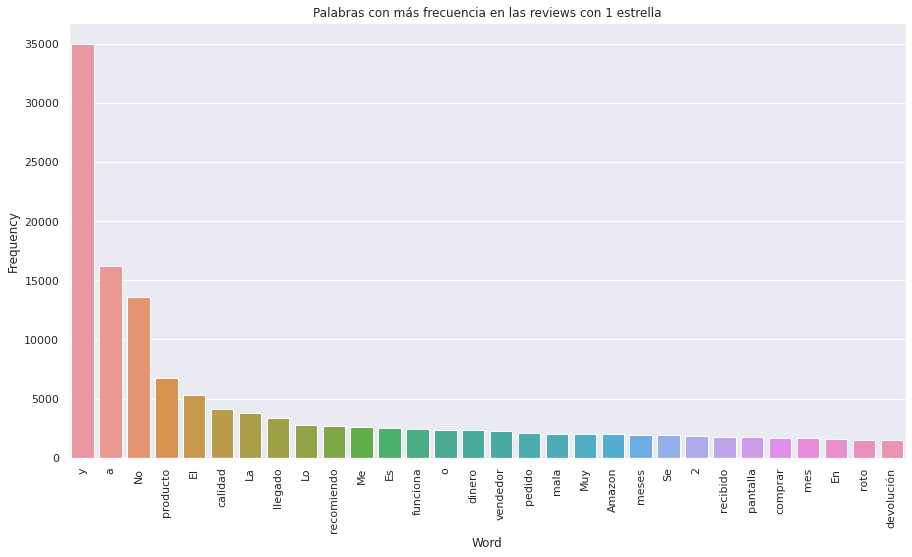

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_1.iloc[:30].Word, y = df_star_1.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)

plt.title("Palabras con más frecuencia en las reviews con 1 estrella")
plt.show()

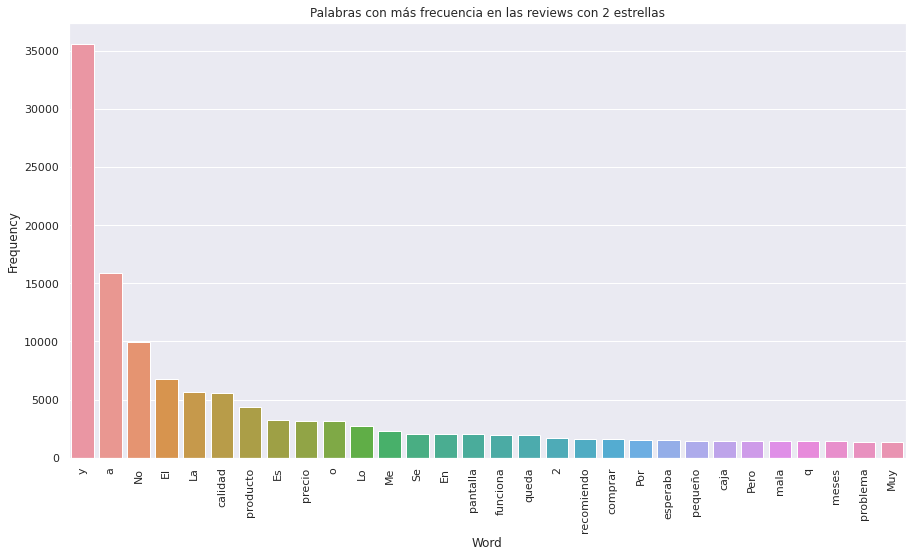

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_2.iloc[:30].Word, y = df_star_2.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 2 estrellas")
plt.show()

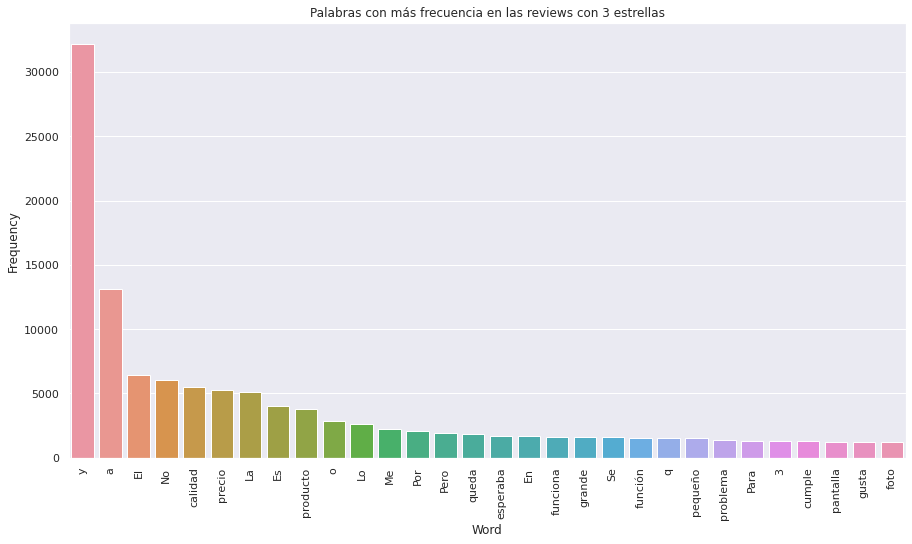

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_3.iloc[:30].Word, y = df_star_3.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 3 estrellas")
plt.show()

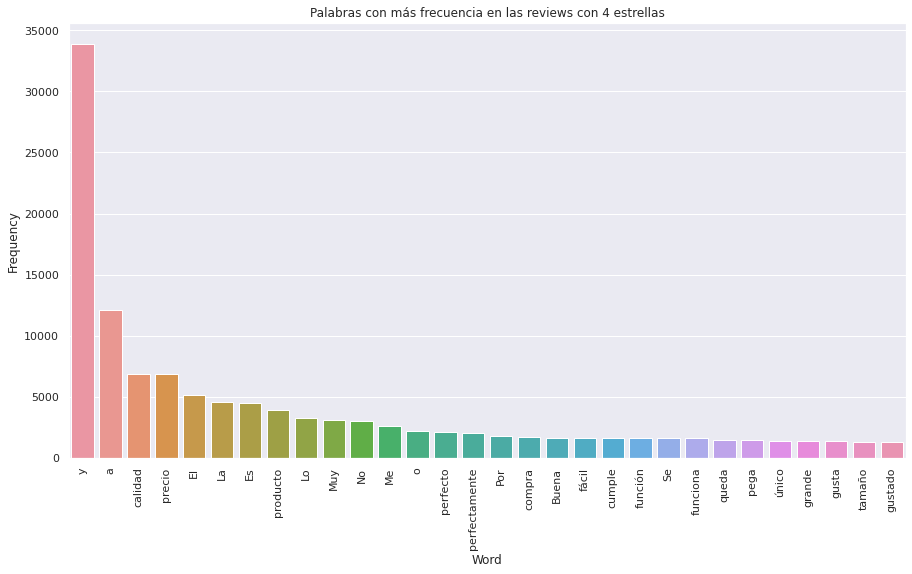

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_4.iloc[:30].Word, y = df_star_4.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 4 estrellas")
plt.show()

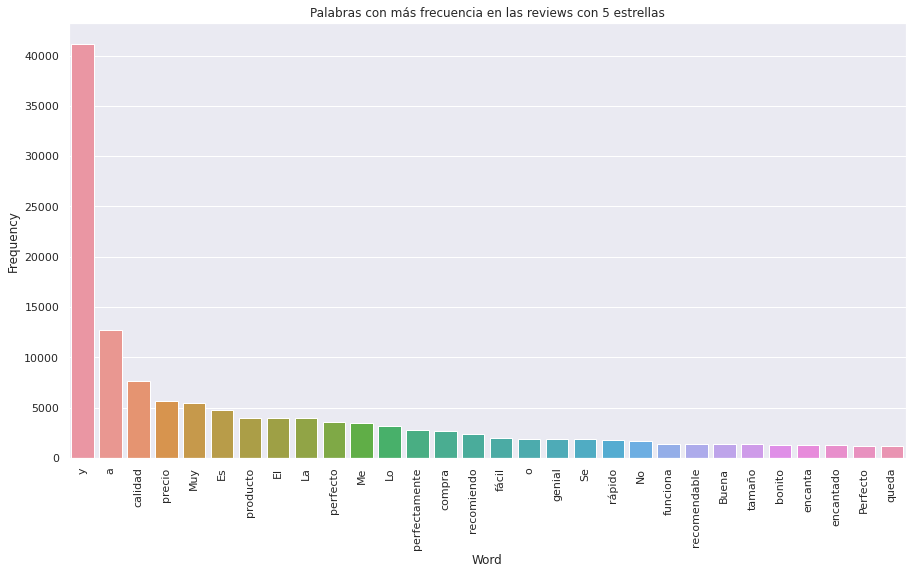

In [ ]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_star_5.iloc[:30].Word, y = df_star_5.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.title("Palabras con más frecuencia en las reviews con 5 estrellas")
plt.show()

En los gráficos presentados se observa una tendencia de palabras con connotaciones negativas en las listas de reviews de 1 y 2 estrellas ("mala", "roto", "devolución", "problema") mientras que en las reviews de 4 y 5 estrellas se observan palabras asociadas a opiniones positivas ("perfectamente", "buena", "fácil", "gusta", "genial", "bonito", "encantado", "recomendable"). Para las reviews de 3 estrellas no se observa una tendencia apreciable en cuanto a la predominancia de palabras positivas o negativas. Otro aspecto a destacar es la presencia en todas las gráficas de palabras como conectores y artículos que no brindan información adicional ("y", "la", "el", "no", "es", "a") las cuales serán removidas a continuación, cuando apliquemos los algoritmos para normalizar y lemmatizar.

####1.3 Normalización y lemmatización

Realizamos el proceso de normalización y lemmatización del archivo train

In [ ]:
# Importamos el lemmatizar de NLTK, y creamos el objeto
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Importamos la librería "re" que nos permite reemplazar caracteres
import re

In [ ]:
review_list=[]
for review in dataset_train.review_body:
    # Reemplazamos los caracteres que no sean letras por espacios. Aquí se incluyen en mayúscula y minúscula las vocales acentuadas, la letra ñ y la diéresis
    review = re.sub("[^a-zA-ZÁÉÍÓÚáéíóúÑñÜü]"," ",str(review))

    # Pasamos todo a minúsculas
    review = review.lower()

    # Tokenizamos para separar las palabras
    review = nlp(review)
    
    # Aplicamos el Lemmatizer
    review = [tok.lemma_.lower() for tok in review]
    
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra)>3]

    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in spacy_stopwords]

    # Volvemos a unir la review
    review=" ".join(review)
    review_list.append(review)

Imprimimos el dataframe train con las reviews originales y sus reviews lemmatizadas

In [ ]:
dataset_train["review_lemm"] = review_list
dataset_train.head()

review_body  ...                                        review_lemm
0  Nada bueno se me fue ka pantalla en menos de 8...  ...  nadar pantalla mesar recibir respuesta fabricante
1  Horrible, nos tuvimos que comprar otro porque ...  ...  horrible comprar inglés informático hora capaz...
2  Te obligan a comprar dos unidades y te llega s...  ...  obligar comprar unidad llegar formar reclamar ...
3  No entro en descalificar al vendedor, solo pue...  ...  entrar descalificar vendedor mesar esperar    ...
4               Llega tarde y co la talla equivocada  ...                     llegar tardar tallar equivocar

[5 rows x 3 columns]

Excluimos las reviews originales y dejamos el dataframe train solo con las lemmatizadas

In [ ]:
dataset_train_lemm = dataset_train[['review_lemm','stars']]
dataset_train_lemm.dropna(axis=0,inplace=True)  # Por si quedaron reviews vacios
dataset_train_lemm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


review_lemm  stars
0  nadar pantalla mesar recibir respuesta fabricante      1
1  horrible comprar inglés informático hora capaz...      1
2  obligar comprar unidad llegar formar reclamar ...      1
3  entrar descalificar vendedor mesar esperar    ...      1
4                     llegar tardar tallar equivocar      1

Procesamos y lemmatizamos el archivo dev

In [ ]:
review_list_dev=[]
for review in dataset_dev.review_body:
    # Reemplazamos los caracteres que no sean letras por espacios. Aquí se incluyen en mayúscula y minúscula las vocales acentuadas, la letra ñ y la diéresis
    review = re.sub("[^a-zA-ZÁÉÍÓÚáéíóúÑñÜü]"," ",str(review))

    # Pasamos todo a minúsculas
    review = review.lower()

    # Tokenizamos para separar las palabras
    review = nlp(review)
    
    # Aplicamos el Lemmatizer 
    review = [tok.lemma_.lower() for tok in review]
    
    # Eliminamos las palabras de menos de 3 letras
    review = [palabra for palabra in review if len(palabra)>3]

    # Sacamos las Stopwords
    review = [palabra for palabra in review if not palabra in spacy_stopwords]

    # Por ultimo volvemos a unir el titular
    review=" ".join(review)
    review_list_dev.append(review)

Imprimimos el dataframe dev con las reviews originales y sus reviews lemmatizadas

In [ ]:
dataset_dev["review_lemm"] = review_list_dev
dataset_dev.head()

review_body  ...                                        review_lemm
0  Malisimo, muy grande demasiado aparatoso y mal...  ...  malisimo grande demasiar aparatoso protector p...
1          No he recibido el pedido no la devolución  ...                           recibir pedir devolución
2  Tengo que buscar otro sistema, este no funcion...  ...  buscar sistema funcionar abrazadera parir agar...
3  Utilicé las brocas de menor diámetro y se me d...  ...  utilizar broca menor diámetro doblar comer man...
4         No me gusta su olor a viejo y aspecto malo  ...                     gustar olor viejo aspecto malo

[5 rows x 3 columns]

Excluimos las reviews originales y dejamos el dataframe dev solo con las lemmatizadas

In [ ]:
dataset_dev_lemm = dataset_dev[['review_lemm','stars']]
dataset_dev_lemm.dropna(axis=0,inplace=True)  # Por si quedaron reviews vacias
dataset_dev_lemm.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


review_lemm  stars
0  malisimo grande demasiar aparatoso protector p...      1
1                           recibir pedir devolución      1
2  buscar sistema funcionar abrazadera parir agar...      1
3  utilizar broca menor diámetro doblar comer man...      1
4                     gustar olor viejo aspecto malo      1

####1.4 Transformación de los datos en un problema binario

#####1.4.1 Transformación dataset Train

Para el archivo train creamos un dataframe que le asigne a las reviews de 1 y 2 estrellas la nueva categoria "opinion" igual a 0 y a las reviews de 4 y 5 estrellas "opinion" igual a 1.

In [ ]:
dataset_train_lemm_neg = dataset_train_lemm[(dataset_train_lemm.stars == 1) | (dataset_train_lemm.stars == 2) ]
print(dataset_train_lemm_neg.shape)
dataset_train_lemm_neg.head()

(80000, 2)


review_lemm  stars
0  nadar pantalla mesar recibir respuesta fabricante      1
1  horrible comprar inglés informático hora capaz...      1
2  obligar comprar unidad llegar formar reclamar ...      1
3  entrar descalificar vendedor mesar esperar    ...      1
4                     llegar tardar tallar equivocar      1

El dataframe "dataset_train_lemm_neg" contiene solamente las opiniones consideradas como negativas

In [ ]:
dataset_train_lemm_neg['opinion'] = 0
dataset_train_lemm_neg.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_lemm  stars  opinion
0  nadar pantalla mesar recibir respuesta fabricante      1        0
1  horrible comprar inglés informático hora capaz...      1        0
2  obligar comprar unidad llegar formar reclamar ...      1        0
3  entrar descalificar vendedor mesar esperar    ...      1        0
4                     llegar tardar tallar equivocar      1        0

In [ ]:
dataset_train_lemm_pos = dataset_train_lemm[(dataset_train_lemm.stars == 4) | (dataset_train_lemm.stars == 5) ]
print(dataset_train_lemm_pos.shape)
dataset_train_lemm_pos.head()

(80000, 2)


review_lemm  stars
120000                          pintar resultar      4
120001     entregar rápido comer falto facturar      4
120002                            enviar rápido      4
120003  quedo material duradero tamaño perfecto      4
120004                    genial oler pegamento      4

El dataframe "dataset_train_lemm_pos" contiene solamente las opiniones consideradas como positivas

In [ ]:
dataset_train_lemm_pos['opinion'] = 1
dataset_train_lemm_pos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_lemm  stars  opinion
120000                          pintar resultar      4        1
120001     entregar rápido comer falto facturar      4        1
120002                            enviar rápido      4        1
120003  quedo material duradero tamaño perfecto      4        1
120004                    genial oler pegamento      4        1

Concatenamos los dataframes "dataset_train_lemm_neg" y "dataset_train_lemm_pos" para obtener un solo dataframe "dataset_train_lemm_2" con opiniones positivas y negativas

In [ ]:
dataset_train_lemm_1 = pd.concat([dataset_train_lemm_neg,dataset_train_lemm_pos],axis=0)
dataset_train_lemm_2 = dataset_train_lemm_1.drop(columns=['stars'])
print(dataset_train_lemm_2.shape)
dataset_train_lemm_2.head()

(160000, 2)


review_lemm  opinion
0  nadar pantalla mesar recibir respuesta fabricante        0
1  horrible comprar inglés informático hora capaz...        0
2  obligar comprar unidad llegar formar reclamar ...        0
3  entrar descalificar vendedor mesar esperar    ...        0
4                     llegar tardar tallar equivocar        0

#####1.4.2 Transformación dataset Dev

Para el archivo dev creamos un dataframe que le asigne a las reviews de 1 y 2 estrellas la nueva categoria "opinion" igual a 0 y a las reviews de 4 y 5 estrellas "opinion" igual a 1.

In [ ]:
dataset_dev_lemm_neg = dataset_dev_lemm[(dataset_dev_lemm.stars == 1) | (dataset_dev_lemm.stars == 2) ]
print(dataset_dev_lemm_neg.shape)
dataset_dev_lemm_neg.head()

(2000, 2)


review_lemm  stars
0  malisimo grande demasiar aparatoso protector p...      1
1                           recibir pedir devolución      1
2  buscar sistema funcionar abrazadera parir agar...      1
3  utilizar broca menor diámetro doblar comer man...      1
4                     gustar olor viejo aspecto malo      1

El dataframe "dataset_dev_lemm_neg" contiene solamente las opiniones consideradas como negativas

In [ ]:
dataset_dev_lemm_neg['opinion'] = 0
dataset_dev_lemm_neg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_lemm  stars  opinion
0  malisimo grande demasiar aparatoso protector p...      1        0
1                           recibir pedir devolución      1        0
2  buscar sistema funcionar abrazadera parir agar...      1        0
3  utilizar broca menor diámetro doblar comer man...      1        0
4                     gustar olor viejo aspecto malo      1        0

In [ ]:
dataset_dev_lemm_pos = dataset_dev_lemm[(dataset_dev_lemm.stars == 4) | (dataset_dev_lemm.stars == 5) ]
print(dataset_dev_lemm_pos.shape)
dataset_dev_lemm_pos.head()

(2000, 2)


review_lemm  stars
3000  robusto francamente cumplir cometer jugar llav...      4
3001                 estupendo relación calidad preciar      4
3002  comprar parir madre contento compactar fácil n...      4
3003                estrechar valer parir parir pintura      4
3004  estrellar probar        walkie funcionar perfe...      4

El dataframe "dataset_dev_lemm_pos" contiene solamente las opiniones consideradas como positivas

In [ ]:
dataset_dev_lemm_pos['opinion'] = 1
dataset_dev_lemm_pos.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_lemm  stars  opinion
3000  robusto francamente cumplir cometer jugar llav...      4        1
3001                 estupendo relación calidad preciar      4        1
3002  comprar parir madre contento compactar fácil n...      4        1
3003                estrechar valer parir parir pintura      4        1
3004  estrellar probar        walkie funcionar perfe...      4        1

Concatenamos los dataframes "dataset_dev_lemm_neg" y "dataset_dev_lemm_pos" para obtener un solo dataframe "dataset_dev_lemm_2" con opiniones positivas y negativas

In [ ]:
dataset_dev_lemm_1 = pd.concat([dataset_dev_lemm_neg,dataset_dev_lemm_pos],axis=0)
dataset_dev_lemm_2 = dataset_dev_lemm_1.drop(columns=['stars'])
print(dataset_dev_lemm_2.shape)
dataset_dev_lemm_2.head()

(4000, 2)


review_lemm  opinion
0  malisimo grande demasiar aparatoso protector p...        0
1                           recibir pedir devolución        0
2  buscar sistema funcionar abrazadera parir agar...        0
3  utilizar broca menor diámetro doblar comer man...        0
4                     gustar olor viejo aspecto malo        0

####1.5 Vectorización con word2vec

Se transforman los dataframes train y dev con las reviews normalizadas y lemmatizadas en listas, para proceder con la vectorización. 

In [ ]:
# Lista train con las reviews positivas y negativas (sin opiniones de 3 estrellas)
all_review_list = []
for i in range(dataset_train_lemm_2.shape[0]):
    review_all = dataset_train_lemm_2.iloc[i].review_lemm #seleccionar la review
    review_all = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_all) # Tokenizar con RegexpTokenizer
    review_all =  [d for d in review_all if d not in spacy_stopwords]# Filtrar por stopwords
    all_review_list.append(review_all) #agregar el resultado a la lista

In [ ]:
# Lista Dev con las reviews positivas y negativas (sin opiniones de 3 estrellas)
all_review_list_dev = []
for i in range(dataset_dev_lemm_2.shape[0]):
    review_all_dev = dataset_dev_lemm_2.iloc[i].review_lemm #seleccionar la review
    review_all_dev = nltk.tokenize.RegexpTokenizer("[\w]+").tokenize(review_all_dev) # Tokenizar con RegexpTokenizer
    review_all_dev =  [d for d in review_all_dev if d not in spacy_stopwords]# Filtrar por stopwords
    all_review_list_dev.append(review_all_dev) #agregar el resultado a la lista

In [ ]:
#Lista total (train y test) (sin opiniones de 3 estrellas)

Master_review_list = all_review_list + all_review_list_dev


**NOTA**: Para efectos académicos se procede a generar el modelo word2vec con los datos de la lista total Master (Train y Dev), en lugar de usar solamente los datos train. Esto se hace con el fin de simplificar la aplicación de la vectorización, evitando tener que hacer una vectorización adicional para las palabras que no estén en Train pero sí estén en la data Dev

In [ ]:
#Se utiliza la librería gensim para importar el modelo word2vec

from gensim.models import Word2Vec

#Se aplica el modelo Skip-gram, con sus respectivos hiperparámetros

# Skip-gram model (sg = 1)
size = 1000
window = 3
min_count = 1
workers = 3
sg = 1

# Se define la ruta en la cual se va a guardar el modelo word2vec

word2vec_model_file = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/" + 'word2vec_' + str(size) + '.model'

# Se entrena el modelo Word2Vec y se guarda el modelo creado

w2v_model = Word2Vec(Master_review_list, min_count = min_count, size = size, workers = workers, window = window, sg = sg)
w2v_model.save(word2vec_model_file)

In [ ]:
# Cargamos el modelo a partir del archivo que se guardó previamente
sg_w2v_model = Word2Vec.load(word2vec_model_file)

Se asignan los vectores a cada instancia de la lista Master (train + dev set)

In [ ]:
# Se define la ruta y el nombre del archivo donde se almacenará la vectorización

word2vec_filename_master = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/" + 'master_review_word2vec.csv'

# Se guardan los vectores asociados en el archivo "master_review_word2vec.csv"

with open(word2vec_filename_master, 'w+') as word2vec_file_master:
    for index, row in enumerate(Master_review_list):
        model_vector = (np.mean([sg_w2v_model[token] for token in row], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file_master.write(header)
            word2vec_file_master.write("\n")
        # Se verifica si la review existe y de lo contrario asigna un vector de ceros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file_master.write(line1)
        word2vec_file_master.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Se asignan los vectores a cada fila del Train set

In [ ]:
# Se define la ruta y el nombre del archivo donde se almacenará la vectorización

word2vec_filename_train = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/" + 'train_review_word2vec.csv'
with open(word2vec_filename_train, 'w+') as word2vec_file_train:
    for index, row in enumerate(all_review_list):
        model_vector = (np.mean([sg_w2v_model[token] for token in row], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file_train.write(header)
            word2vec_file_train.write("\n")
        # Se verifica si la review existe y de lo contrario asigna un vector de ceros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file_train.write(line1)
        word2vec_file_train.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Se asignan los vectores a cada fila del Dev set

In [ ]:
# Se define la ruta y el nombre del archivo donde se almacenará la vectorización

word2vec_filename_dev = "/content/drive/MyDrive/Colab Notebooks/Proyecto_3/" + 'dev_review_word2vec.csv'
with open(word2vec_filename_dev, 'w+') as word2vec_file_dev:
    for index, row in enumerate(all_review_list_dev):
        model_vector = (np.mean([sg_w2v_model[token] for token in row], axis=0)).tolist()
        if index == 0:
            header = ",".join(str(ele) for ele in range(1000))
            word2vec_file_dev.write(header)
            word2vec_file_dev.write("\n")
        # Se verifica si la review existe y de lo contrario asigna un vector de ceros
        if type(model_vector) is list:  
            line1 = ",".join( [str(vector_element) for vector_element in model_vector] )
        else:
            line1 = ",".join([str(0) for i in range(1000)])
        word2vec_file_dev.write(line1)
        word2vec_file_dev.write('\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


###2. Machine Learning con vectorización word2vec

A continuación aplicaremos métodos de Machine Learning tales que dada la crítica de un producto, asigne la categoría positiva o negativa. Por tanto los métodos que aplicaremos son de clasificación. Con el fin de evaluar el desempeño de los modelos, se utilizará la métrica de Accuracy score,  ya que es una de las más directas y fáciles de entender en el ámbito de los modelos de clasificación y adicionalmente es una métrica efectiva cuando las clases en los dataset se encuentran equilibradas, como ocurre en nuestro caso. Accuracy score se define como el porcentaje de elementos clasificados correctamente con respecto al total de predicciones.

Como modelo benchmark tomamos el mejor resultado obtenido en el Proyecto 3, que fue el modelo de SVC con un accuracy score para el set Dev de 82.42 %.

####2.1 Arbol de decisión

Definimos y entrenamos el modelo de árbol de decisión:

---



In [ ]:
#Se importa el árbol de decisión de clasificación
from sklearn.tree import DecisionTreeClassifier

# Se cargan las instancias train a partir del archivo guardado previamente
word2vec_df_train = pd.read_csv(word2vec_filename_train)

# Instanciamos el modelo
clf_decision_word2vec = DecisionTreeClassifier()

# Se entrena el modelo

clf_decision_word2vec.fit(word2vec_df_train, dataset_train_lemm_2['opinion'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Cargamos las instancias Dev a partir del archivo que se guardó previamente
word2vec_df_dev = pd.read_csv(word2vec_filename_dev)

In [ ]:
print("Accuracy Score Train",clf_decision_word2vec.score(word2vec_df_train ,dataset_train_lemm_2['opinion']))
print("Accuracy Score Dev",clf_decision_word2vec.score(word2vec_df_dev ,dataset_dev_lemm_2['opinion']))

Accuracy Score Train 0.99351875
Accuracy Score Dev 0.71575


####2.2 SVC

Definimos y entrenamos el modelo SVC, realizando optimización de hiperparámmetros:

In [ ]:
#Importamos la clase correspondiente para aplicar optimización de hiperparámetros por Random Search
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Importamos e instanciamos la clase LinearSVC

from sklearn.svm import LinearSVC
svc_w2v = LinearSVC()

# Grilla para Random Search
param_grid_svc_w2v = {'C':[0.01,0.1,1,10,20],'max_iter':[100000]}

In [ ]:
model_svc_w2v = RandomizedSearchCV(svc_w2v, param_grid_svc_w2v,
        n_iter=2, random_state=42, cv=2)

# Entrenamos: SVC con la grilla definida arriba y CV con tamaño de Fold=2
model_svc_w2v.fit(word2vec_df_train,dataset_train_lemm_2['opinion'])

RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                       fit_intercept=True, intercept_scaling=1,
                                       loss='squared_hinge', max_iter=1000,
                                       multi_class='ovr', penalty='l2',
                                       random_state=None, tol=0.0001,
                                       verbose=0),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1, 1, 10, 20],
                                        'max_iter': [100000]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [ ]:
print("Mejores parametros: "+str(model_svc_w2v.best_params_)) # Indica los mejores hiperparametros (por defecto segun accuracy) 
print("Mejor accuracy score (train) para el SVC 1: "+str(model_svc_w2v.best_score_)+'\n')    # Indica el mejor score

scores_svc_w2v = pd.DataFrame(model_svc_w2v.cv_results_)
scores_svc_w2v

Mejores parametros: {'max_iter': 100000, 'C': 20}
Mejor accuracy score (train) para el SVC 1: 0.7579



mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0      11.335758      0.716591  ...        0.009987                2
1    1994.317540    103.925198  ...        0.011088                1

[2 rows x 12 columns]

In [ ]:
print("Accuracy score (dev) para modelo de SVC: ", model_svc_w2v.score(word2vec_df_dev,dataset_dev_lemm_2['opinion']))

Accuracy score (dev) para modelo de SVC:  0.815


####2.3 Análisis de Resultados de modelos de Machine Learning

El árbol de decisión del punto 2.1 arrojó un accuracy train de 99.35 % y un accuracy dev de 70.90 %, por lo cual fue necesario aplicar modelos más complejos y optimizar los hiperparámetros y así disminuir el overfitting. De esta forma, en el punto 2.2 se aplicó el modelo SVC con optimización de hiperparámetros con Random Search, obteniendo un accuracy score train de 75.73% y un accuracy score dev de 81.40%.

Sin embargo, despues de implementar los modelos de Machine Learning con vectorización word2vec, podemos ver que no se pudo mejorar el valor de accuracy score Dev con respecto al modelo benchmark. Entonces surge la necesidad de aplicar métodos adicionales que permitan mejorar las predicciones de opiniones negativas y positivas, por lo que a continuación se desarrolla la aplicación de redes neuronales.



###3. Redes neuronales con librería Keras

A continuación se procederá a utilizar la librería Keras para vectorizar los archivos Train y Dev y luego para aplicar dos modelos de Redes Neuronales, con los cuales se espera poder mejorar la métrica accuracy score del modelo benchmark. Keras es una librería de redes neuronales de código abierto, escrita en Python, la cual está diseñada para hacer desarrollos relativamente rápidos en el área del deep learning y es fácil de usar.

####3.1 Procesamiento de los archivos Train y Dev

#####3.1.1 Transformación dataset Train

Para el archivo train creamos un dataframe que le asigne a las reviews de 1 y 2 estrellas la nueva categoria "opinion" igual a 0 y a las reviews de 4 y 5 estrellas "opinion" igual a 1. Pero a diferencia del punto 1.4.1, en esta ocasión descartaremos la columna "review_lemm" con las opiniones normalizadas y lemmatizadas y trabajaremos con la columna "review_body" que contiene las opiniones originales.

In [ ]:
dataset_train_neg = dataset_train[(dataset_train.stars == 1) | (dataset_train.stars == 2) ]
print(dataset_train_neg.shape)
dataset_train_neg.head()

(80000, 3)


review_body  ...                                        review_lemm
0  Nada bueno se me fue ka pantalla en menos de 8...  ...  nadar pantalla mesar recibir respuesta fabricante
1  Horrible, nos tuvimos que comprar otro porque ...  ...  horrible comprar inglés informático hora capaz...
2  Te obligan a comprar dos unidades y te llega s...  ...  obligar comprar unidad llegar formar reclamar ...
3  No entro en descalificar al vendedor, solo pue...  ...  entrar descalificar vendedor mesar esperar    ...
4               Llega tarde y co la talla equivocada  ...                     llegar tardar tallar equivocar

[5 rows x 3 columns]

In [ ]:
dataset_train_neg['opinion'] = 0
dataset_train_neg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_body  ...  opinion
0      Nada bueno se me fue ka pantalla en menos de 8...  ...        0
1      Horrible, nos tuvimos que comprar otro porque ...  ...        0
2      Te obligan a comprar dos unidades y te llega s...  ...        0
3      No entro en descalificar al vendedor, solo pue...  ...        0
4                   Llega tarde y co la talla equivocada  ...        0
...                                                  ...  ...      ...
79995  He quedado decepcionado con estos pinceles. As...  ...        0
79996  No las volveré a comprar. Hay pocas unidades e...  ...        0
79997   Sistema operativo muy justo. Se queda bloqueado.  ...        0
79998  La conectividad es mala. El wifi no funciona b...  ...        0
79999  El aparato es fácil de instalar y configurar, ...  ...        0

[80000 rows x 4 columns]

In [ ]:
dataset_train_pos = dataset_train[(dataset_train.stars == 4) | (dataset_train.stars == 5) ]
print(dataset_train_pos.shape)
dataset_train_pos.head()

(80000, 3)


review_body  ...                              review_lemm
120000            Tiene buena pinta, veremos el resultado  ...                          pintar resultar
120001     Entrega rápida como siempre pero falta factura  ...     entregar rápido comer falto facturar
120002                           Está bien y envío rápido  ...                            enviar rápido
120003  Queda muy bien, material duradero y tamaño per...  ...  quedo material duradero tamaño perfecto
120004              Genial aunque huele mucho a pegamento  ...                    genial oler pegamento

[5 rows x 3 columns]

In [ ]:
dataset_train_pos['opinion'] = 1
dataset_train_pos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


review_body  ...  opinion
120000            Tiene buena pinta, veremos el resultado  ...        1
120001     Entrega rápida como siempre pero falta factura  ...        1
120002                           Está bien y envío rápido  ...        1
120003  Queda muy bien, material duradero y tamaño per...  ...        1
120004              Genial aunque huele mucho a pegamento  ...        1
...                                                   ...  ...      ...
199995  Mando funciona perfectamente y cumple con toda...  ...        1
199996  Compré la batería con cierta reticencia, pero ...  ...        1
199997           Buena calidad. Satisfecha con la compra.  ...        1
199998                 Perfecto para el cumple de mi hijo  ...        1
199999  Súper bien! Las brochas son buenas, no sé meno...  ...        1

[80000 rows x 4 columns]

In [ ]:
dataset_train_1 = pd.concat([dataset_train_neg,dataset_train_pos],axis=0)
dataset_train_2 = dataset_train_1.drop(columns=['stars'])
print(dataset_train_2.shape)
dataset_train_2.head()

(160000, 3)


review_body  ... opinion
0  Nada bueno se me fue ka pantalla en menos de 8...  ...       0
1  Horrible, nos tuvimos que comprar otro porque ...  ...       0
2  Te obligan a comprar dos unidades y te llega s...  ...       0
3  No entro en descalificar al vendedor, solo pue...  ...       0
4               Llega tarde y co la talla equivocada  ...       0

[5 rows x 3 columns]

#####3.1.2 Transformación dataset Dev

Para el archivo dev creamos un dataframe que le asigne a las reviews de 1 y 2 estrellas la nueva categoria "opinion" igual a 0 y a las reviews de 4 y 5 estrellas "opinion" igual a 1. Pero a diferencia del punto 1.4.2, en esta ocasión descartaremos la columna "review_lemm" con las opiniones normalizadas y lemmatizadas y trabajaremos con la columna "review_body" que contiene las opiniones originales.

In [ ]:
dataset_dev_neg = dataset_dev[(dataset_dev.stars == 1) | (dataset_dev.stars == 2) ]
dataset_dev_neg['opinion'] = 0
print(dataset_dev_neg.shape)
dataset_dev_neg.head()

(2000, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


review_body  ...  opinion
0  Malisimo, muy grande demasiado aparatoso y mal...  ...        0
1          No he recibido el pedido no la devolución  ...        0
2  Tengo que buscar otro sistema, este no funcion...  ...        0
3  Utilicé las brocas de menor diámetro y se me d...  ...        0
4         No me gusta su olor a viejo y aspecto malo  ...        0

[5 rows x 4 columns]

In [ ]:
dataset_dev_pos = dataset_dev[(dataset_dev.stars == 4) | (dataset_dev.stars == 5) ]
dataset_dev_pos['opinion'] = 1
print(dataset_dev_pos.shape)
dataset_dev_pos.head()

(2000, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


review_body  ...  opinion
3000  Son robustas y francamente cumplen con su come...  ...        1
3001                  Estupenda relación calidad-precio  ...        1
3002  Lo compré para mi madre. Esta muy contenta. Es...  ...        1
3003  UN POCO ESTRECHO ,PERO VALE PARA LO QUE ES,PAR...  ...        1
3004  Le doy cuatro estrellas porque aún no lo he pr...  ...        1

[5 rows x 4 columns]

In [ ]:
dataset_dev_1 = pd.concat([dataset_dev_neg,dataset_dev_pos],axis=0)
dataset_dev_2 = dataset_dev_1.drop(columns=['stars'])
print(dataset_dev_2.shape)
dataset_dev_2.tail()

(4000, 3)


review_body  ... opinion
4995  Me ha encantado la cesta. Ha llegado impecable...  ...       1
4996                 Desempeña su función correctamente  ...       1
4997  Me ha encantado la diadema! Las flores son tal...  ...       1
4998  A mi me gustan mucho las fundas TPU, ya que so...  ...       1
4999  El artículo ha cumplido con las expectativas q...  ...       1

[5 rows x 3 columns]

####3.2 Vectorización

A través de la clase Tokenizer de la librería Keras se separan las reviews por palabras y con el método "texts_to_sequences" se hace la vectorización, obteniendo los valores X_train y X_dev.

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataset_train_2.review_body.values)

X_train = tokenizer.texts_to_sequences(dataset_train_2.review_body.values)
X_dev = tokenizer.texts_to_sequences(dataset_dev_2.review_body.values)

vocab_size = len(tokenizer.word_index) + 1  # Se define el vocab_size agregando 1 debido al index reservado 0


Definimos los valores de Y_train y Y_dev a partir de la columna "opinion" de los respectivos dataframes.

In [ ]:
Y_train = dataset_train_2.opinion.values
print(type(Y_train))

Y_dev = dataset_dev_2.opinion.values
print(type(Y_dev))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Se termina la vectorización, rellenando con ceros en el caso de las reviews que no alcancen la longitud de 100 palabras.

In [ ]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100 # máxima cantidad de palabras que definimos para una review

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_dev = pad_sequences(X_dev, padding='post', maxlen=maxlen)

print(X_train[1, :]) # Ejemplo de vectorización para una review específica

[1002  230 1814    3   89   85   45   50 1515    3 3485  983   50   14
  117    1   21  278  164 1440    1 1741    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


####3.3 Red neuronal #1

Procedemos a definir una red neuronal, asignando los respectivos valores de los hiperparámetros del modelo 

In [ ]:
from keras.models import Sequential
from keras import layers
from keras import backend as k
k.clear_session() # Limpiar modelo preexistente en caso de que exista

model = Sequential()

#La clase Embedding transforma numeros enteros en vectores de tamaño fijo. Sólo puede usarse como primera capa en un modelo, segun la documentación de Keras
#input_dim es el tamaño del vocabulario 
#output_dim es el tamaño de los vectores de salida
#input_length es la longitud de cada instancia
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=100, 
                           input_length=maxlen)) 

# GlobalMaxPool1D toma el valor máximo de los valores de entrada en una dimensión
model.add(layers.GlobalMaxPool1D()) 

model.add(layers.Dense(10, activation='relu')) # Capa de 10 nodos
model.add(layers.Dense(1, activation='sigmoid')) #Capa de 1 nodo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5250500   
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 5,251,521
Trainable params: 5,251,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Se entrena el modelo compilado previamente
history = model.fit(X_train, Y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_dev, Y_dev),
                    batch_size=100)

# Se presenta el accuracy score para los sets Train y Dev
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy Modelo #1: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_dev, Y_dev, verbose=False)
print("Dev Accuracy Modelo #1 :  {:.4f}".format(accuracy))


Training Accuracy Modelo #1: 0.9818
Dev Accuracy Modelo #1 :  0.8702


####3.4 Red neuronal #2

Definimos la red neuronal #2 haciendo algunos cambios con respecto a la red neuronal #1:

*   Se añade una capa adicional de 10 nodos.
*   Se reduce el batch size.



In [ ]:
from keras.models import Sequential
from keras import layers
from keras import backend as k
k.clear_session() # Limpiar modelo preexistente en caso de que exista

#La clase Embedding transforma numeros enteros en vectores de tamaño fijo. Sólo puede usarse como primera capa en un modelo, segun la documentación de Keras
#input_dim es el tamaño del vocabulario 
#output_dim es el tamaño de los vectores de salida
#input_length es la longitud de cada instancia
model_2 = Sequential()
model_2.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=100, 
                           input_length=maxlen))

# GlobalMaxPool1D toma el valor máximo de los valores de entrada en una dimensión
model_2.add(layers.GlobalMaxPool1D())

model_2.add(layers.Dense(10, activation='relu')) # Capa de 10 nodos
model_2.add(layers.Dense(10, activation='relu')) # Capa de 10 nodos
model_2.add(layers.Dense(1, activation='sigmoid')) # Capa de 1 nodo
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          5250500   
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1010      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 5,251,631
Trainable params: 5,251,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Se entrena el modelo compilado previamente
history_2 = model_2.fit(X_train, Y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_dev, Y_dev),
                    batch_size=10)

# Se presenta el accuracy score para los sets Train y Dev
loss, accuracy = model_2.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy Modelo #2: {:.4f}".format(accuracy))
loss, accuracy = model_2.evaluate(X_dev, Y_dev, verbose=False)
print("Dev Accuracy Modelo #2:  {:.4f}".format(accuracy))


Training Accuracy Modelo #2: 0.9510
Dev Accuracy Modelo #2:  0.8838


####3.5 Análisis de Resultados

Al aplicar las redes neuronales se pudo obtener una mejora en la métrica respecto al accuracy score Dev de 82.42% del modelo benchmark. En el punto 3.3 la red neuronal arrojó un accuracy score train de 98% y accuracy score dev de 87%, por lo cual en el punto 3.4 se introdujeron cambios como añadir una capa adicional y reducir el batch size, disminuyendo el overfitting con un accuracy score train 95% y un accuracy score Dev de 88%

###4. Conclusiones

*   Al realizar el análisis exploratorio de los datos, se observó una tendencia en cuanto a la connotación de palabras encontradas según la calificación dada por el usuario. Para reviews con 1 y 2 estrellas hubo palabras con significado negativo entre las más frecuentes mientras que para las reviews con 4 y 5 estrellas hubo palabras con significado positivo. Para las reviews de 3 estrellas no hay una tendencia clara de palabras positivas o negativas.

*   La vectorización word2vec no fue capaz de mejorar el rendimiento de modelos de Machine Learning en comparación con el modelo benchmark del proyecto 3, en el cual se vectorizó mediante la técnica tf-idf.

* El uso de redes neuronales sí permitió obtener una mejora en el accuracy score del dataset Dev con respecto al modelo benchmark del proyecto 3. 

* Se observó que fue posible optimizar manualmente los hiperparámetros de las redes neuronales para obtener mejoras en la métrica accuracy score del dataset Dev,  así como también disminución del overfitting.



###5. Recomendaciones

*   Incluir en el análisis la aplicación de los modelos de Machine Learning para el archivo Test, no solo para los archivos Train y Dev.

*   Importar modelos adicionales en español de la librería spaCy, como "es_core_news_md" o "es_core_news_lg".


* Utilizar otros modelos avanzados de vectorización tales como doc2vec, sense2vec, GloVe, BERT, entre otros.

* Variar la forma de transformación del problema original al problema binario, asignando las reviews de 3 estrellas a las opiniones positivas, a las opiniones negativas o creando una categoría nueva de opiniones neutrales.

